In [59]:
import pandas as pd
import sqlite3
import os
import numpy as np
#import pantab
# PANTAB IS BROKEN

In [2]:
# Connect to the SQL database here

# 

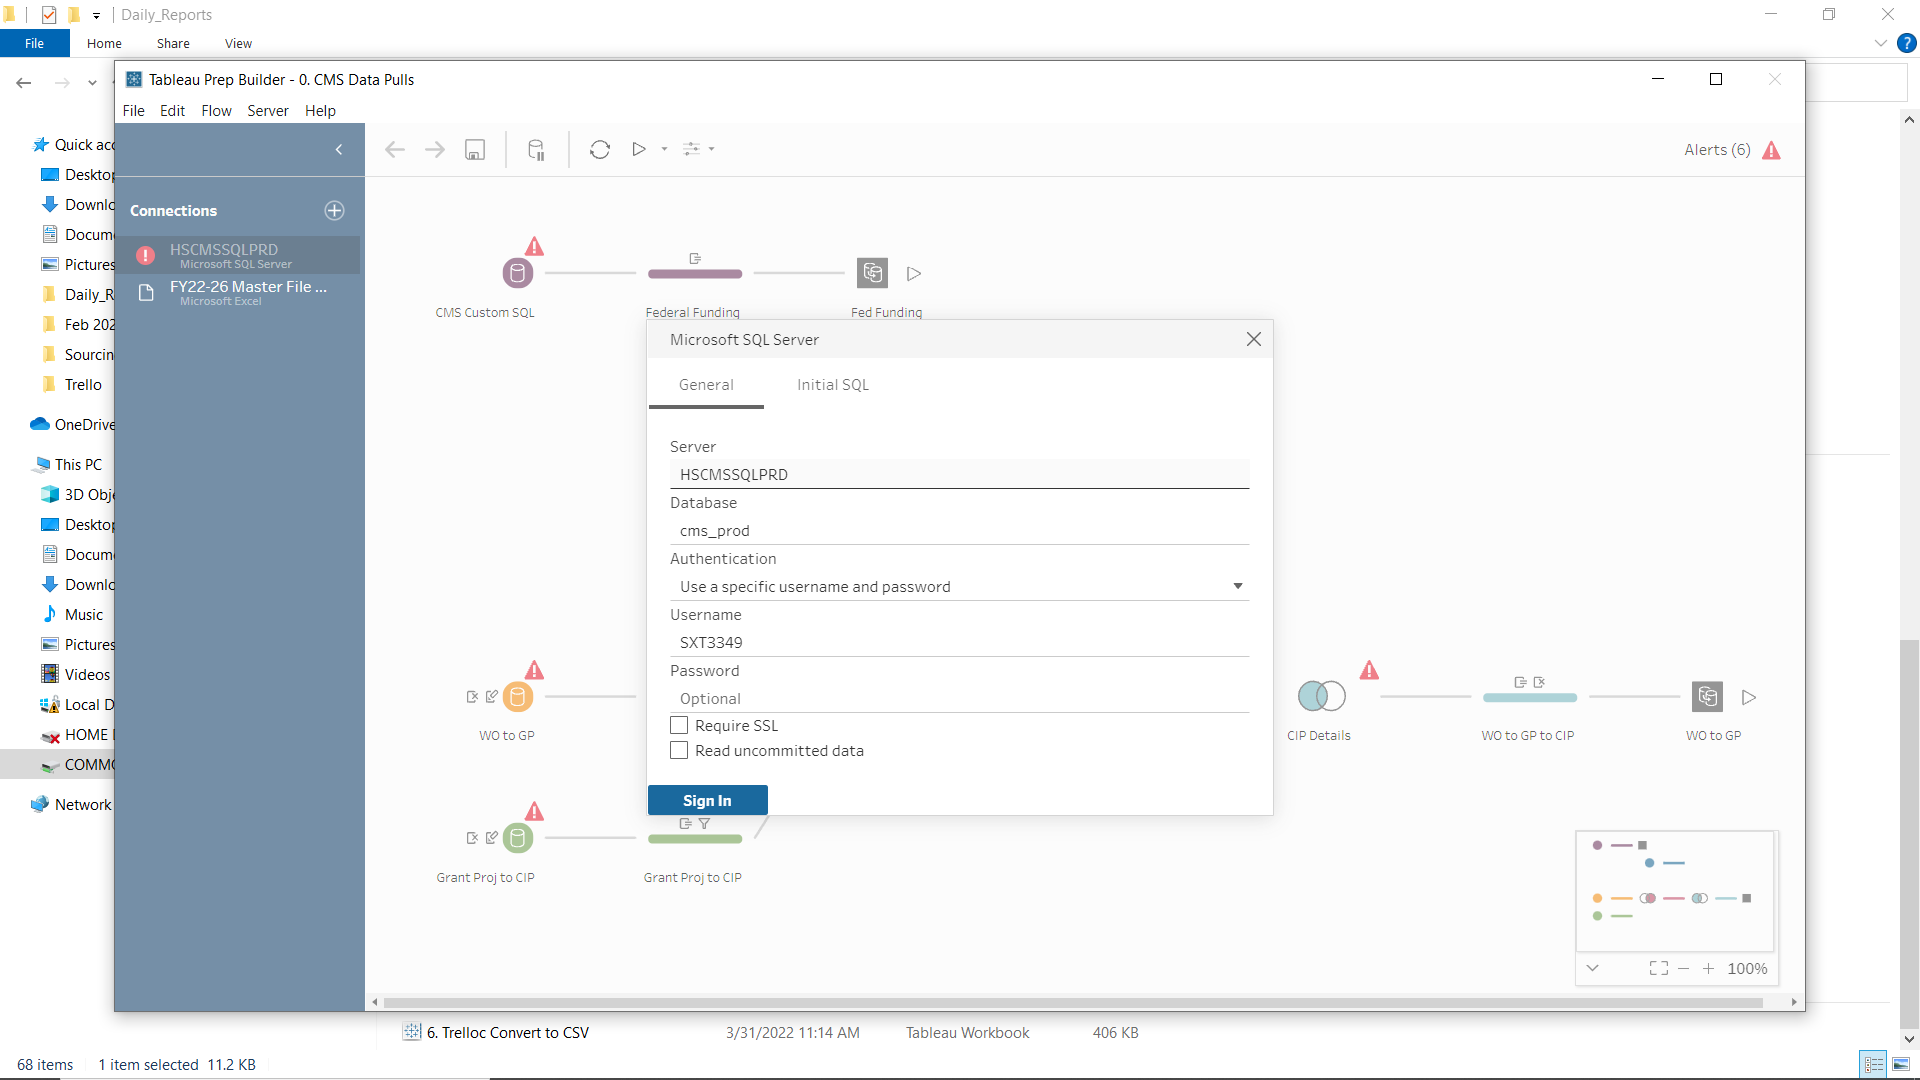

**After connection:**
- 

In [2]:
federal_projects_path = '/Volumes/commons/PP-PROLOG/VENDOR_MANAGEMENT/Data_Analytics/Data_Files/CIP_CMS_Ref_Data/FY22-26 Master File as of 6-21-21 FINAL - Federal Projects.xlsx'

In [3]:
fed_projects_df = pd.read_excel(federal_projects_path)

fed_projects_df.columns = fed_projects_df.iloc[3]
fed_projects_df = fed_projects_df[4:]

# Get both sheets and union them

In [4]:
fed_projects_df

3,NaN,CIP ID,Grant Project,Project Name,CIP Project status,Grant Project status,MBTA CIP Y/N,ANF Plan Item,Phase,CIP Mode,...,Change 3/19 - 4/30 Explanation,Change Before 3/19?,Change Before 3/19 Explanation,NaN,Grant Project,Total Authorized Budget (CIP),CMS Budget (as of 6/26/21),Variance,Notes,NaN
4,,P0003,LXBBORA25,Green Line B-Branch Consolidation,A,A,Y,NaN,Design,Green Line,...,AS 4/21/21: Reflecting 3/18 CIP change transfe...,Y,SKBW 3/16/21: Filled in matching funds informa...,NaN,LXBBORA25,7311734,7311734,0,NaN,NaN
5,,P0003,R16A05A25,Green Line B-Branch Consolidation,A,A,Y,NaN,Design,Green Line,...,AS 4/21/21: Reflecting 3/18 CIP change transfe...,Y,SKBW 3/16/21: Filled in matching funds informa...,NaN,R16A05A25,21966558,21966557,1,NaN,NaN
6,,P0003,P14002A25,Green Line B-Branch Consolidation,A,C,Y,NaN,Design,Green Line,...,NaN,NaN,NaN,NaN,P14002A25,216295,216295,0,NaN,NaN
7,,P0006,540002H62,Gloucester Drawbridge Replacement,A,A,Y,NaN,Construction,Commuter Rail,...,NaN,NaN,NaN,NaN,540002H62,60000000,60000000,0,NaN,NaN
8,,P0006,540017H62,Gloucester Drawbridge Replacement,A,A,Y,NaN,Construction,Commuter Rail,...,NaN,NaN,NaN,NaN,540017H62,24884284,24884284,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 1

In [5]:
global_mount_point = '/Volumes/commons/PP-PROLOG/'
data_files_path = global_mount_point + 'VENDOR_MANAGEMENT/Data_Analytics/Data_Files/Daily_Reports'

In [6]:
input_files = ['PO Code Tables v2.xlsx', 'DBE Data Corrections v3.xlsx', 'PL_PURCH_ORDER_DATA_PT2.xlsx', 
              'BC_REQSv1.xlsx', 'Master Inventory Tables v1c.xlsx', 'PL_PURCH_ORDER_DATA_PT1.xlsx', 
              'SPECIAL PROJ PO LIST v5.xlsx', 'Dept_Code_Decoder.xlsx', 'Finance_Code_Tables.xlsx', 
              'PL_ACCOUNT_LIST.hyper', 'PL_MODE_LIST.xlsx', 'PL_FUND_CODE.xlsx', 'PL_ACTIVITY_CODE_LIST.xlsx',
              'PL_PAYROLL_FUNCTIONS_LIST.xlsx', 'PL_VOUCHER_PYMTS_PT7.xlsx', 'PL_PURCH_ORDER_DATA_PT3.xlsx',
              'PL_PURCH_ORDER_DATA_PT4.xlsx','PL_PURCH_ORDER_DATA_PT5.xlsx','PL_PURCH_ORDER_DATA_PT6.xlsx',
              'Item_to_Group_Codes.hyper', 'FMIS Vendor Classification.hyper', 'Vendor Diversity Reference Tables.xlsx',
              'PL_PURCH_ORDER_DATA_PT0b.xlsx', 'PL_PURCH_ORDER_DATA_PT0a.xlsx', 'PL_PURCH_ORDER_DATA_PT7.xlsx',
              'PL_WO_DESCRIPTIONS.xlsx', 'PL_LINE_CATEGORY_CODES.xlsx', 'PL_DEPT_ID_LIST.xlsx',
              'CMS Sql Data.hyper', 'CMS WO to Grant to CIP Sql Data.hyper']
# also use federal_projects_path
# How to read in hyper files in pandas? pantab.frame_from_hyper('path to hyper')b

Steps:
1. Get PO data, Union it 
    - PL_PURCH_ORDER_DATA_PT0a
    - PL_PURCH_ORDER_DATA_PT0b
    - PL_PURCH_ORDER_DATA_PT1
    - PL_PURCH_ORDER_DATA_PT2
    - PL_PURCH_ORDER_DATA_PT3
    - PL_PURCH_ORDER_DATA_PT4
    - PL_PURCH_ORDER_DATA_PT5
    - PL_PURCH_ORDER_DATA_PT6
    - PL_PURCH_ORDER_DATA_PT7
    - Change data types 
2. Pull in Line Status and Legacy Taxonomy
    - PO Code Tables v2
    - Remove FMIS Old Taxonomy for the right join
    - Left and Right Joins
3. Pull in Category Codes
    - PL_LINE_CATEGORY_CODES
    - Remove CAT - Category Code
    - Aggregate category codes (investigate later)
    - Keep max effective dates
    - Right join
4. Department Codes
    - PL_DEPT_ID_LIST
    - Right Join
5. Department Levels
    - Finance_Code_Tables
    - Right Join
6. Classifications
    - FMIS Vender Classifications
    - Right Join
7. Data splits here:
    a. pull in PO Line Data
        - PO Code Tables v2, LJ
        - PO Code Tables v2, LJ.
        - this step is duplicated for some reason
    b. Aggregate PO Line Amounts
        - join PO Totals with the PO Line Data
8. Pull in Bus Req IDs
    - BC_REQS v1; LJ
9. Add Grant Projects
    - PL_WO_DESCRIPTIONS; clean; RJ
10. Add Req Grants
    - PL_WO_DESCRIPTIONS; clean; RJ
11. Add federal funding
    - CMS Sql Data.hyper
    - Clean data, RJ
12. 2 Clean Steps
13. Federal Percent List

In [7]:
# Read in PO Data

po_converter = {'PO - PO Line No':str, 'PO - PO Sched Line':str, 'PO - PO Distrib Line':str, 'PO - Req Line No':str,
                'PO - RFQ Line No':str, 'PO - Req Distrib No':str, 'PO - Req Sched No':str, 'PO - FMIS DBE Goal':str}

po_datafiles = ['PL_PURCH_ORDER_DATA_PT0a.xlsx',
                'PL_PURCH_ORDER_DATA_PT0b.xlsx',
                'PL_PURCH_ORDER_DATA_PT1.xlsx',
                'PL_PURCH_ORDER_DATA_PT2.xlsx',
                'PL_PURCH_ORDER_DATA_PT3.xlsx',
                'PL_PURCH_ORDER_DATA_PT4.xlsx',
                'PL_PURCH_ORDER_DATA_PT5.xlsx',
                'PL_PURCH_ORDER_DATA_PT6.xlsx',
                'PL_PURCH_ORDER_DATA_PT7.xlsx']

# Read in PO data files
po_dataframes = []

for datafile in po_datafiles:
    print('Reading in {}'.format(datafile))
    temp_df = pd.read_excel(data_files_path + '/' + datafile, converters=po_converter)
    
    po_dataframes.append(temp_df)

# Main bottleneck: excels take forever to read into pandas. 

# Perform union on them
full_po_df = pd.concat(po_dataframes)

Reading in PL_PURCH_ORDER_DATA_PT0a.xlsx
Reading in PL_PURCH_ORDER_DATA_PT0b.xlsx
Reading in PL_PURCH_ORDER_DATA_PT1.xlsx
Reading in PL_PURCH_ORDER_DATA_PT2.xlsx
Reading in PL_PURCH_ORDER_DATA_PT3.xlsx
Reading in PL_PURCH_ORDER_DATA_PT4.xlsx
Reading in PL_PURCH_ORDER_DATA_PT5.xlsx
Reading in PL_PURCH_ORDER_DATA_PT6.xlsx
Reading in PL_PURCH_ORDER_DATA_PT7.xlsx


In [8]:
processed_po_df = full_po_df.copy(deep=True)

po_fields_removed = ['Table Names', 'PO - PO Post Status', 'PO - Dispatch Action', 'Match Fig',
                    'PO - Prepaid PO Flag', 'PO - PO Prepaid Amt', 'PO - Distrib Line Process Flag',
                    'PO - In Process Flag']

po_fields_removed_new = ['PO - PO Post Status', 'PO - Dispatch Action', 'PO - Prepaid PO Flag', 
                         'PO - PO Prepaid Amt', 'PO - Distrib Line Process Flag', 'PO - In Process Flag']

po_field_converter = {'PO - PO Hdr Match Process Inst':str, 'PO - FMIS DBE Goal':float, 'PO - FMIS DBE Committed':float}

po_datetime_conversions = ['PO - Query Date', 'PO - PO Last Update', 'PO - Contract Expire Date']

# Remove fields
processed_po_df.drop(po_fields_removed_new, axis=1)

# Convert other fields
processed_po_df['PO - PO Hdr Match Process Inst'] = processed_po_df['PO - PO Hdr Match Process Inst'].astype('str')
processed_po_df['PO - FMIS DBE Goal'] = pd.to_numeric(processed_po_df['PO - FMIS DBE Goal'])
processed_po_df['PO - FMIS DBE Committed'] = pd.to_numeric(processed_po_df['PO - FMIS DBE Committed'])

# Convert certain fields to datetimes
processed_po_df['PO - Query Date'] = pd.to_datetime(processed_po_df['PO - Query Date'])
processed_po_df['PO - PO Last Update'] = pd.to_datetime(processed_po_df['PO - PO Last Update'])
processed_po_df['PO - Contract Expire Date'] = pd.to_datetime(processed_po_df['PO - Contract Expire Date'])

In [11]:
# Clean Step

# Calculated Fields
# 'PO - Requesting Dept': if 'PO - FMIS Requesting Dept ID' is NULL, then put in the value for 'PO - Dept ID'
processed_po_df['CALC - PO Requesting Dept'] = np.where(processed_po_df['PO - FMIS Requesting Dept ID'].isnull(), processed_po_df['PO - Dept ID'], processed_po_df['PO - FMIS Requesting Dept ID'])

# 'PO - Budget Status Descr': 'PO - Budget Status': {'E': 'Budget Error', 'N':'Not Checked', 'V':'Valid'}
budget_status_thresh = [
    (processed_po_df['PO - Budget Status'] == 'E'),
    (processed_po_df['PO - Budget Status'] == 'N'),
    (processed_po_df['PO - Budget Status'] == 'V')
]

budget_status_values = ['Budget Error', 'Not Checked', 'Valid']

processed_po_df['PO - Budget Status Descr'] = np.select(budget_status_thresh, budget_status_values)


# 'PO - Contract': 
'''
IF [PO - Dept ID] = '841002' THEN
    NULL
ELSEIF  ISNULL([PO - FMIS Contract]) AND NOT ISNULL([PO - FMIS Contract ID]) THEN
   IF ISNULL([PO - FMIS Contract ID]) OR [PO - FMIS Contract ID] = '<NA>' OR [PO - FMIS Contract ID] = '<NONE>'  THEN
        NULL
   ELSE
        [PO - FMIS Contract ID]
   END

ELSEIF [PO - FMIS Contract] = '<NONE>' OR  [PO - FMIS Contract] = '<NA>' THEN
        NULL
ELSE
    IF LEN([PO - FMIS Contract]) > LEN([PO - FMIS Contract ID])THEN
        [PO - FMIS Contract]
    ELSE
         IF [PO - FMIS Contract ID] = '<NONE>' OR [PO - FMIS Contract ID] = '<NA>' THEN
            NULL
         ELSE
            [PO - FMIS Contract ID]
         END
    END
END
'''

# Null if PO - Dept ID == '841002', 
# or PO - FMIS Contract is NULL and (FMIS Contract ID is NA or FMIS Contract ID is none)
# or PO - FMIS Contract == '<NONE>' or '<NA>'

# Is PO - FMIS Contract if:
# none of the other things, and len PO - FMIS Contract > len(PO - FMIS Contract ID)

# Is PO - FMIS Contract ID if:
# len(PO - FMIS Contract) < len(PO - FMIS Contract ID), PO FMIS Contract ID isn't none or na


'''
po_contract_thresh = [
    ((processed_po_df['PO - Dept ID'] == '841002') or 
     ((processed_po_df['PO - FMIS Contract'].isnull) and 
      ((processed_po_df['FMIS Contract ID'] == '<NA>') or (processed_po_df['FMIS Contract ID'] == '<NONE>'))) or 
    ((processed_po_df['PO - FMIS Contract'] == '<NA>') or (processed_po_df['PO - FMIS Contract'] == '<NONE>'))),
    (len(processed_po_df['PO - FMIS Contract']) > len(processed_po_df['PO - FMIS Contract ID'])),
    ((len(processed_po_df['PO - FMIS Contract']) > len(processed_po_df['PO - FMIS Contract ID'])) and 
      ((processed_po_df['PO - FMIS Contract ID'] != '<NONE>') and (processed_po_df['PO - FMIS Contract ID'] != '<NA>')))
]
'''
# do an NP.where first with <NA> and <NONE>


# Field Renaming:
po_field_rename_key = {'PO - Bid Categ Id':'PO - FMIS Bid Categ Id', 
                       'PO - FMIS Dept Short Descr': 'PO - Dept Short Descr',
                       'PO - FMIS Dept Descr':'PO - Dept Descr'}

processed_po_df.rename(columns=po_field_rename_key, inplace=True)

### Pull in Line Status Codes

##### THIS ONE ISN'T WORKING!

In [14]:
processed_po_df.columns

Index(['PO - Business Unit', 'PO - Business Unit GL', 'PO - FMIS PO Status',
       'PO - PO No', 'PO - PO Date', 'PO - PO Apprvl Date', 'PO - Buyer',
       'PO - FMIS Origin', 'PO - FMIS Bid Categ', 'PO - FMIS Bid Short Descr',
       'PO - PO Descr', 'PO - Vendor ID', 'PO - Vendor Name',
       'PO - Vendor Short Name', 'PO - PO Line No', 'PO - PO Line Chng Status',
       'PO - PO Line Cancel Status', 'PO - FMIS Line Total Qty',
       'PO - FMIS Line Total Amt', 'PO - FMIS Line Amt', 'PO - FMIS Line UOM',
       'PO - PO Sched Line', 'PO - PO Distrib Line',
       'PO - FMIS Distrib Line Qty', 'PO - PO Distrib Line Status',
       'PO - Inventory Item ID', 'PO - Mfg ID', 'PO - Mfg Item ID',
       'PO - PO Line Descr', 'PO - FMIS Contract', 'PO - FMIS Contract ID',
       'PO - Contract Expire Date', 'PO - Dept ID',
       'PO - FMIS Requesting Dept ID', 'PO - Dept Short Descr',
       'PO - Dept Descr', 'PO - FMIS DBE Status', 'PO - FMIS DBE Committed',
       'PO - FMIS DBE Goal

In [50]:
line_status_codes_df = pd.read_excel(data_files_path + '/Reference_Tables/PO Code Tables v2.xlsx', sheet_name='Line_Status_Codes')

line_status_codes_df.rename(columns={'PO_Line_Cancel_Status':'PO - PO Line Cancel Status'}, inplace=True)
# Join with PO Data on 'PO - Line Cancel Status' == 'PO_Line_Cancel_Status'

processed_po_with_line_status_codes = processed_po_df.merge(line_status_codes_df, on='PO - PO Line Cancel Status', how='left')

In [51]:
legacy_taxonomy_df = pd.read_excel(data_files_path + '/Reference_Tables/PO Code Tables v2.xlsx', sheet_name='Legacy Taxonomy')

# Remove column 'FMIS_Old Taxonomy'
legacy_taxonomy_df.drop('FMIS_Old_Taxonomy', axis=1, inplace=True)
legacy_taxonomy_df.rename(columns={'PO_Taxonomy_Categ_ID':'PO - Taxonomy Categ ID'}, inplace=True)

# Join with PO Data on 'PO_Taxonomy_Categ_ID' == 'PO - Taxonomy Categ ID'
processed_po_with_legacy = processed_po_with_line_status_codes.merge(legacy_taxonomy_df, on='PO - Taxonomy Categ ID', how='left')

### Pull in Category Codes

In [52]:
# Load category codes
category_codes_df = pd.read_excel(data_files_path + '/PL_LINE_CATEGORY_CODES.xlsx')

category_codes_df.drop('CAT - Category Code', axis = 1, inplace=True)

# renamings
category_code_renamings = {'CAT - Category ID': 'PO_Taxonomy_Categ_ID',
                          'CAT - Category Descr': 'CAT - PO Category Descr',
                          'CAT - Category Short Descr': 'CAT - PO Category Short Descr',
                          'CAT - Physical Nature': 'CAT - PO Physical Nature',
                          'CAT - Primary Buyer': 'CAT - PO Primary Buyer',
                          'CAT - Comments':'CAT - PO Comments'}

category_codes_df.rename(columns=category_code_renamings, inplace=True)

In [53]:
# Clean Step
category_codes_df['Max - Effctv Date'] = category_codes_df['CAT - Effctv Date']

In [54]:
# HOW ARE WE AGGREGATING THIS?

# Aggregation Step
# groupby everything but max effective date, get the max of that one


In [55]:
# Filter and remove fields
category_codes_df = category_codes_df.loc[category_codes_df['CAT - Effctv Date'] == category_codes_df['Max - Effctv Date']]
#print(category_codes_df)
category_codes_df.drop(['Max - Effctv Date', 'CAT - Effctv Date'], axis=1, inplace=True)

In [29]:
# Join with the PO data
category_codes_df.rename(columns={'PO_Taxonomy_Categ_ID':'PO - Taxonomy Categ ID'},inplace=True)

processed_po_with_cat_codes = processed_po_with_legacy.merge(category_codes_df, on='PO - Taxonomy Categ ID', how='left')

### Pull in Dept Codes, Dept Levels, and Vendor Classification

In [56]:
# Dept Codes
dept_codes_df = pd.read_excel(data_files_path + '/PL_DEPT_ID_LIST.xlsx')

dept_codes_df.drop(['DEPT - Dept Eff Date', 'DEPT - Dept Status'],axis=1, inplace=True)

dept_codes_df.rename(columns={'DEPT - Dept ID': 'CALC - PO Requesting Dept', 
                              'DEPT - Dept Descr': 'PO - Request Dept Descr',
                              'DEPT - Dept Short Descr': 'PO - Request Dept Short Descr'},inplace=True)

processed_po_with_cat_codes['CALC - PO Requesting Dept'] = processed_po_with_cat_codes['CALC - PO Requesting Dept'].astype('str')
dept_codes_df['CALC - PO Requesting Dept'] = dept_codes_df['CALC - PO Requesting Dept'].astype('str')

# Right Join with PO Data
# PO Data doesn't have CALC - PO Requesting Dept
processed_po_with_dept_codes = processed_po_with_cat_codes.merge(dept_codes_df, on='CALC - PO Requesting Dept', 
                                                                 how='left')

In [57]:
# Dept Levels

# This seems to be the wrong file – what should it be instead?
dept_levels_df = pd.read_excel(global_mount_point + 'VENDOR_MANAGEMENT/Data_Analytics/Data_Files/Finance_Tables/Finance_Code_Tables.xlsx', sheet_name='Department Levels')

# Change data types
dept_levels_df['DEPT - ORG ID'] = dept_levels_df['DEPT - ORG ID'].astype('str')
dept_levels_df['DEPT - Level 3 ID'] = dept_levels_df['DEPT - Level 3 ID'].astype('str')
dept_levels_df['DEPT - Level 4 ID'] = dept_levels_df['DEPT - Level 4 ID'].astype('str')
dept_levels_df['DEPT - Level 5 ID'] = dept_levels_df['DEPT - Level 5 ID'].astype('str')

# Rename columns
dept_levels_rename_key = {'DEPT - ORG ID': 'PO - Dept ID', 
                            'DEPT - ORG NAME': 'DEPT - PO ORG Name',
                            'DEPT - Level': 'DEPT - PO ORG Level',
                            'DEPT - Level 3 ID': 'DEPT - PO Level 3 ID',
                            'DEPT - Level 3 Name': 'DEPT - PO Level 3 Name',
                            'DEPT - Level 4 ID': 'DEPT - PO Level 4 ID',
                            'DEPT - Level 4 Name': 'DEPT - PO Level 4 Name',
                            'DEPT - Level 4 APPR Lead': 'DEPT - PO Level 4 APPR Lead',
                            'DEPT - Level 5 ID': 'DEPT - PO Level 5 ID',
                            'DEPT - Level 5 Name': 'DEPT - PO Level 5 ID',
                            'DEPT - Division': 'DEPT - PO Division',
                            'CTR - Alt Dept Name': 'PO - Contract Alt Dept Name',
                            'CTR - Alt Contact Lvl 1': 'PO - Contract Alt Contact Lvl 1',
                            'CTR - Alt Contact Lvl 2': 'PO - Contract Alt Contact Lvl 2'}

dept_levels_df.rename(columns=dept_levels_rename_key,inplace=True)

processed_po_with_dept_codes['PO - Dept ID'] = processed_po_with_dept_codes['PO - Dept ID'].astype('str')

# Right Join with PO Data
processed_po_with_dept_levels = processed_po_with_dept_codes.merge(dept_levels_df, on='PO - Dept ID', how='left')

In [49]:
# Vendor Classification

# pantab is not working right now.
vendor_classification_df = pantab.frame_from_hyper(global_mount_point + 'VENDOR_MANAGEMENT/Data_Analytics/Data_Files/MBTA_Vendors/FMIS Vendor Classification.hyper')

vendor_classification_df.drop(['CLASS - Reporting Period', 'CLASS - Vendor Key'], axis=1, inplace=True)

# Join with main PO dataframe
processed_po_with_vendor = processed_po_with_dept_levels.merge(vendor_classification_df, how='left', by='')

NameError: name 'pantab' is not defined

### Clean PO Dataframe

In [ ]:
clean_po_df = processed_po_with_vendor.copy(deep=True)
# Remove 'VND - Vendor ID' and 'VND - Vendor Name'

# Lots of Calculated Fields
clean_po_df['CALC - PO Line Amt'] = np.where(clean_po_df['PO - PO Line Cancel Status'] == 'X' or clean_po_df['PO - PO Distrib Line Status'] == 'X', 
                                             0, clean_po_df['PO - FMIS Line Amt'])

clean_po_df['CALC - PO Distrib Qty'] = np.where(clean_po_df['PO - PO Line Cancel Status'] == 'X' or clean_po_df['PO - PO Distrib Line Status'] == 'X', 
                                             0, clean_po_df['PO - FMIS Distrib Line Qty'])

# PO Procurement Dept: maps buyer, FMIS origin, business unit.

clean_po_df['CALC - Different Dept'] = np.where(clean_po_df['PO - FMIS Requesting Dept ID'].isnull() or clean_po_df['PO - Dept ID'] != clean_po_df['PO - Requesting Dept ID'],
                                                True, False)

clean_po_df['DEPT - PO ORG Name'] = np.where(clean_po_df['DEPT - PO ORG Name'].isnull(), clean_po_df['PO - Dept Descr'], clean_po_df['DEPT - PO ORG Name'])

clean_po_df['DEPT - PO ORG ID'] = np.where(clean_po_df['DEPT - PO ORG ID'].isnull(), clean_po_df['PO - Dept Descr'], clean_po_df['DEPT - PO ORG ID'])

clean_po_df['DEPT - PO ORG Level'] = np.where(clean_po_df['DEPT - PO ORG Level'].isnull(), 'MBTA-Wide', clean_po_df['DEPT - PO ORG Level'])

clean_po_df['DEPT - PO Division'] = np.where(clean_po_df['DEPT - PO Division'].isnull(), 'MBTA-Wide', clean_po_df['DEPT - PO Division'])

# Group PO Descr and PO Line Descr

clean_po_df.drop(['VND - Vendor Name', 'VND - Vendor ID'], axis=1, inplace = True)

clean_po_df['PO - Contract Alt Contact Lvl 1'] = np.where(clean_po_df['PO - Contract Alt Contact Lvl 1'].isnull(), clean_po_df['DEPT - PO Level 4 APPR Lead'], clean_po_df['PO - Contract Alt Contact Lvl 1'])

clean_po_df['PO - Contract Alt Dept Name'] = np.where(clean_po_df['PO - Contract Alt Dept Name'].isnull(), clean_po_df['DEPT - PO Level 4 Name'], clean_po_df['PO - Contract Alt Dept Name'])


## Split Dataframe, add more, remerge. 

In [ ]:
# Aggregate PO Line Amounts 

In [ ]:
# Clean Step: Calculated fields
fmis_thresh_conditions = [
    (clean_po_df['CALC - FMIS PO Hdr Amt'] == 0),
    (clean_po_df['CALC - FMIS PO Hdr Amt'] > 0) & (clean_po_df['CALC - FMIS PO Hdr Amt'] <= 3500),
    (clean_po_df['CALC - FMIS PO Hdr Amt'] > 3500) & (clean_po_df['CALC - FMIS PO Hdr Amt'] <= 50000),
    (clean_po_df['CALC - FMIS PO Hdr Amt'] > 50000)
]

fmis_thresh_values = ['Zero Value', '<3.5k', '3.5k-$50k', '>$50k']

clean_po_df['CALC - PO FMIS Threshold'] = np.select(fmis_thresh_conditions, fmis_thresh_values)

fmis_thresh_conditions2 = [
    (clean_po_df['CALC - PO Hdr Amt'] == 0) or (clean_po_df['CALC - PO Hdr Amt'].isnull()),
    (clean_po_df['CALC - PO Hdr Amt'] > 0) & (clean_po_df['CALC - PO Hdr Amt'] <= 3500),
    (clean_po_df['CALC - PO Hdr Amt'] > 3500) & (clean_po_df['CALC - PO Hdr Amt'] <= 50000),
    (clean_po_df['CALC - PO Hdr Amt'] > 50000)
]

clean_po_df['CALC - PO Threshold'] = np.select(fmis_thresh_conditions2, fmis_thresh_values)

fmis_thresh_expanded = [
    (clean_po_df['CALC - PO Hdr Amt'] == 0) or (clean_po_df['CALC - PO Hdr Amt'].isnull()),
    (clean_po_df['CALC - PO Hdr Amt'] > 0) & (clean_po_df['CALC - PO Hdr Amt'] <= 3500),
    (clean_po_df['CALC - PO Hdr Amt'] > 3500) & (clean_po_df['CALC - PO Hdr Amt'] <= 50000),
    (clean_po_df['CALC - PO Hdr Amt'] > 50000) & (clean_po_df['CALC - PO Hdr Amt'] <= 250000),
    (clean_po_df['CALC - PO Hdr Amt'] > 250000) & (clean_po_df['CALC - PO Hdr Amt'] <= 350000),
    (clean_po_df['CALC - PO Hdr Amt'] > 350000) & (clean_po_df['CALC - PO Hdr Amt'] <= 500000),
    (clean_po_df['CALC - PO Hdr Amt'] > 50000)
]

fmis_thresh_values_expanded = ['Zero Value', '<3.5k', '3.5k-$50k', '$050-250k', '$250-350k', '$350-500k', '>$500k']

clean_po_df['CALC - PO Threshold (Expanded)'] = np.select(fmis_thresh_expanded, fmis_thresh_values_expanded)

In [111]:
po_status_codes = pd.read_excel(data_files_path + '/Reference_Tables/PO Code Tables v2.xlsx', sheet_name='PO_Status_Codes')

po_status_codes.rename(columns={'PO_Status_Code':'PO - FMIS PO Status'},inplace=True)

clean_po_df_with_status = clean_po_df.merge(po_status_codes, on='PO - FMIS PO Status', how='left')

NameError: name 'clean_po_df' is not defined

In [112]:
# PO DBE status
po_dbe_status = pd.read_excel(data_files_path + '/Reference_Tables/PO Code Tables v2.xlsx', sheet_name='PO_DBE_Status')

In [114]:
po_dbe_status.rename(columns={'PO_DBE_Status':'PO - FMIS DBE Status'},inplace=True)

clean_po_with_dbe_status = clean_po_df_with_status.merge(po_dbe_status, on='PO - FMIS DBE Status', how='left')

NameError: name 'clean_po_df_with_status' is not defined

In [ ]:
# Join split dataframes back together.

rejoined_po_df = clean_po_df.merge(clean_po_df_with_status, how='left', on=['PO - Business Unit', 'PO - PO No'])

**Pull in Bus Ctr Req ID's**

In [ ]:
bus_req_ids = pd.read_excel(data_files_path + '/BC_REQS v1.xlsx', sheet_name='Bus Ctr Req IDs')

bus_req_ids.rename(columns={'REQ_ID':'PO - Req ID'}, inplace=True)

rejoined_with_bus_reqs = rejoined_po_df.merge(bus_req_ids, by='PO - Req ID', how='left')

**Pull in WO to Grant** 

In [ ]:
po_wo_to_grant_df = pd.read_excel(data_files_path + '/PL_WO_DESCRIPTIONS.xlsx', sheet_name='PO WO to Grant')

po_wo_to_grant_df.drop(['WO - Import Date', 'WO - Date Closed', 'Query Date'], axis=1, inplace=True)

po_wo_grant_renaming_key = {'WO - Work Order': 'PO - PO Work Order'
                           'WO - WO Descr': 'PO - PO Work Order Descr',
                           'WO - WO Status': 'PO - Work Order Status',
                           'WO - Grant ID':'CMS - PO Grant ID',
                           'WO - Grant Descr':'CMS - PO Grant Descr',
                           'WO - Project Code': 'CMS - PO Proj Code',
                           'WO - Project Descr': 'CMS - PO Proj Descr',
                           'WO - WO Contract': 'CMS - PO WO Contract',
                           'WO - CMS MAC Code': 'CMS - PO MAC Code',
                           'WO - CIP Code': 'CIP - PO CIP Code',
                           'WO - CIP Status': 'CIP - PO CIP Status',
                           'WO - CIP Descr': 'CIP - PO CIP Program Descr',
                           'WO - Curr Estimate': 'CMS - PO WO Curr Estimate',
                           'WO - Comitd Funds': 'CMS - PO WO Comitd Funds',
                           'WO - Apprvd Amt': 'CMS - PO WO Apprvd Amt',
                           'WO - LTD Exp': 'CMS - PO WO LTD Exp'}

po_wo_to_grant_df['WO - Curr Estimate'] = po_wo_to_grant_df['WO - Curr Estimate'].astype('float64')

po_wo_to_grant_df.rename(columns=po_wo_grant_renaming_key, inplace=True)

# Clean step
po_wo_to_grant_df['PO - PO Work Order Descr'] = po_wo_to_grant_df['PO - PO Work Order Descr'].strip()

# Join with PO data
rejoined_with_work_orders = rejoined_with_bus_reqs.merge(po_wo_to_grant_df, by='PO - PO Work Order', how='left')

rejoined_with_work_orders['CMS - PO Grant Proj'] = rejoined_with_work_orders['CMS - PO Grant ID'] + rejoined_with_work_orders['CMS - PO Proj Code']



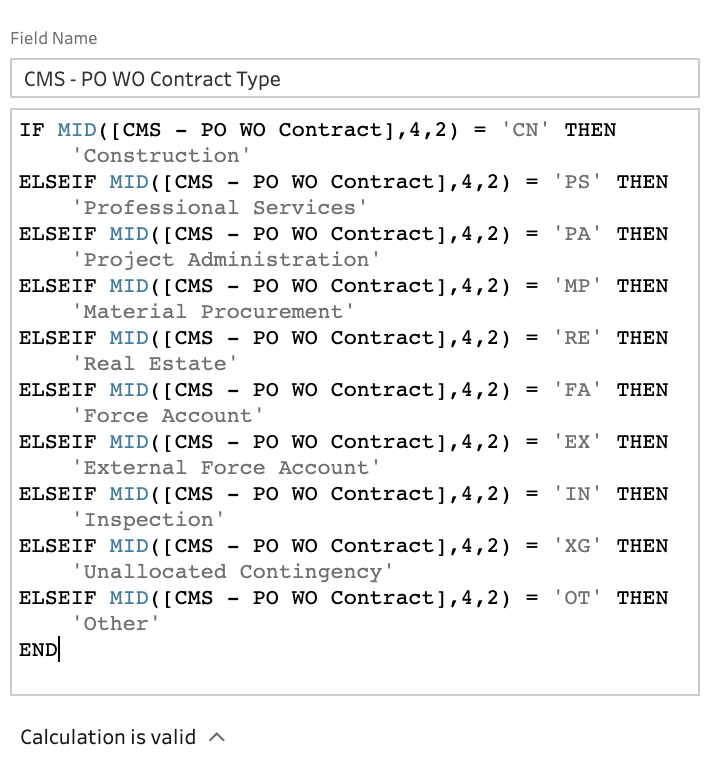

TODO: Implement this. 

In [ ]:
# Mid: [string], start, length. 

contract_wo_conditions = [
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'CN'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'PS'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'PA'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'MP'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'RE'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'FA'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'EX'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'IN'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'XG'),
    (rejoined_with_work_orders['CMS - PO WO Contract'][4:6] == 'OT')
]

contract_values = ['Construction', 'Professional Services', 'Project Administration', 'Material Procurement',
                  'Real Estate', 'Force Account', 'External Force Account', 'Inspection', 'Unallocated Contingency',
                  'Other']

rejoined_with_work_orders['CALC - PO WO Contract Type'] = np.select(contract_wo_conditions, contract_values)

**Req WO to Grant**

In [ ]:
req_wo_to_grant = pd.read_excel(data_files_path + 'PL_WO_DESCRIPTIONS.xlsx', sheet_name='Req WO to Grant')

req_wo_removals = ['Query Date', 'WO - Status', 'WO - Estimate', 'WO - Comitd Funds', 'WO - Apprvd Amt',
                  'WO - LTD Exp', 'WO - Import Date', 'WO - Date Closed', 'WO - WO Status', 'WO - Curr Estimate']

req_wo_rename_key = {
    'WO - Work Order': 'PO - Req Work Order',
    'WO - WO Descr': 'PO - Req Work Order Descr',
    'WO - Grant ID': 'CMS - PO Req Grant ID',
    'WO - Project Code': 'CMS - PO Req Proj Code',
    'WO - Project Descr': 'CMS - PO Req Proj Descr',
    'WO - Grant Descr': 'CMS - PO Req Grant Descr',
    'WO - WO Contract': 'CMS - PO Req WO Contract',
    'WO - CMS MAC Code': 'CMS - PO Req MAC Code',
    'WO - CIP Code': 'CIP - PO Req CIP Code',
    'WO - CIP Status': 'CIP - PO Req CIP Status',
    'WO - CIP Descr': 'CIP - PO Req CIP Program Descr'
}

req_wo_to_grant.drop(req_wo_removals, axis=1, inplace=True)

req_wo_to_grant.rename(columns=req_wo_rename_key, inplace=True)

# Trim whitespace from PO - Req Work Order Descr
req_wo_to_grant['PO - Req Work Order Descr'].str.strip()

In [ ]:
# Join with main PO dataframe. 

rejoined_with_req_wo = rejoined_with_work_orders.merge(req_wo_to_grant, by='PO - Req Work Order', how='left')

rejoined_with_req_wo['CMS - PO Req Grant Proj'] = rejoined_with_req_wo['CMS - PO Req Grant ID'] + rejoined_with_req_wo['CMS - PO Req Proj Code']

contract_req_wo_conditions = [
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'CN'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'PS'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'PA'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'MP'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'RE'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'FA'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'EX'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'IN'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'XG'),
    (rejoined_with_req_wo['CMS - PO Req WO Contract'][4:6] == 'OT')
]

contract_req_wo_values = ['Construction', 'Professional Services', 'Project Administration', 'Material Procurement',
                  'Real Estate', 'Force Account', 'External Force Account', 'Inspection', 'Unallocated Contingency',
                  'Other']

rejoined_with_req_wo['CALC - PO WO Contract Type'] = np.select(contract_req_wo_conditions, contract_req_wo_values)

In [ ]:
# Connect to CMS Sql Data here

# placeholder for the merge with SQL
rejoined_with_fed_pct_sql = rejoined_with_req_wo.copy(deep=True)

In [ ]:
# Fed Funding Clean Step

rejoined_with_fed_pct_sql['CMS - PO Proj Code'] = np.where(rejoined_with_fed_pct_sql['CMS - PO Proj Code'].isnull(), 
                                                          rejoined_with_fed_pct_sql['proj_code'], 
                                                          rejoined_with_fed_pct_sql['CMS - PO Proj Code'])

rejoined_with_fed_pct_sql['CMS - PO Proj Descr'] = np.where(rejoined_with_fed_pct_sql['CMS - PO Proj Descr'].isnull(), 
                                                          rejoined_with_fed_pct_sql['proj_description'], 
                                                          rejoined_with_fed_pct_sql['CMS - PO Proj Descr'])

rejoined_with_fed_pct_sql['CMS - PO Grant ID'] = np.where(rejoined_with_fed_pct_sql['CMS - PO Grant ID'].isnull(), 
                                                          rejoined_with_fed_pct_sql['grant_id'], 
                                                          rejoined_with_fed_pct_sql['CMS - PO Grant ID'])

rejoined_with_fed_pct_sql['CMS - PO Grant Descr'] = np.where(rejoined_with_fed_pct_sql['CMS - PO Grant Descr'].isnull(), 
                                                          rejoined_with_fed_pct_sql['grant_description'], 
                                                          rejoined_with_fed_pct_sql['CMS - PO Grant Descr'])

rejoined_with_fed_pct_sql['CIP - PO CIP Code'] = np.where(rejoined_with_fed_pct_sql['CIP - PO CIP Code'].isnull(), 
                                                          rejoined_with_fed_pct_sql['cip_code'], 
                                                          rejoined_with_fed_pct_sql['CIP - PO CIP Code'])

rejoined_with_fed_pct_sql['CIP - PO CIP Program Descr'] = np.where(rejoined_with_fed_pct_sql['CIP - PO CIP Program Descr'].isnull(), 
                                                          rejoined_with_fed_pct_sql['cip_description'], 
                                                          rejoined_with_fed_pct_sql['CIP - PO CIP Program Descr'])

rejoined_with_fed_pct_sql['CIP - PO CIP Status'] = np.where(rejoined_with_fed_pct_sql['CIP - PO CIP Status'].isnull(), 
                                                          rejoined_with_fed_pct_sql['status'], 
                                                          rejoined_with_fed_pct_sql['CIP - PO CIP Status'])

rejoined_with_fed_pct_sql.drop('status', axis=1)

In [ ]:
# More complex calculations
po_funding_type_thresh = [
    (rejoined_with_fed_pct_sql['PO - PO Work Order'].isnull()),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'J'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'C'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'P'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'R'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'L'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Type'].isnull()]

po_funding_type_values = ['No Work Order', 'Federal Funds', 'Reimburs.', 'Pay-Go', 'Bond', 'Bond', 'Funding Not Found']
     
rejoined_with_fed_pct_sql['CMS - PO Funding Type'] = np.select(po_funding_type_thresh, po_funding_type_values)

In [ ]:
po_funding_src_thresh = [
    (rejoined_with_fed_pct_sql['PO - PO Work Order'].isnull()),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'J'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'C'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'P'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'R'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'L'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src'].isnull()]

po_funding_src_values = ['No Work Order', 'Federal - Legacy', 'Reimb - Legacy', 'Pay-Go/Legacy', 
                          'Bond - Legacy', 'Bond - Legacy', 'Src Not Found']
     
rejoined_with_fed_pct_sql['CMS - PO Funding Src'] = np.select(po_funding_src_thresh, po_funding_src_values)

In [ ]:
po_funding_src_code_thresh = [
    (rejoined_with_fed_pct_sql['PO - PO Work Order'].isnull()),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'J'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'C'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'P'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'R'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull() and rejoined_with_fed_pct_sql['CMS - PO Grant Proj'][0] == 'L'),
    (rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'].isnull()]

po_funding_src_code_values = ['NOWRKORD', 'FEDLEGACY', 'REIMBLEGACY', 'PYGLEGACY', 'BNDLEGACY', 'BNDLEGACY', 'NOSRCFOUND']
     
rejoined_with_fed_pct_sql['CMS - PO Funding Src Code'] = np.select(po_funding_src_code_thresh, po_funding_src_code_values)

In [ ]:
rejoined_with_fed_pct_sql['CMS - bPO Paylist Funding Type'] = np.where(rejoined_with_fed_pct_sql['PO - PO Work Order'].isnull(),
                                                               'No Work Order',
                                                               rejoined_with_fed_pct_sql['CMS - PO Paylist Funding Type'])

In [ ]:

# Calculation for 'CALC - CMS PO Funding Group'
IF ISNULL([PO - PO Work Order]) THEN
    'No Work Order'
ELSEIF ISNULL([CMS - PO Funding Type]) THEN
      IF LEFT([CMS - PO Grant Proj],1) = 'J' THEN
          'Federal'
      ELSEIF LEFT([CMS - PO Grant Proj],1) = 'C' THEN
          'Reimburs.' 
      ELSEIF LEFT([CMS - PO Grant Proj],1) = 'P' THEN
          'State'  
      ELSEIF LEFT([CMS - PO Grant Proj],1) = 'R' OR LEFT([CMS - PO Grant Proj],1) = 'L' THEN
          'State'
      ELSE
      	'Funding Not Found' 
      END
ELSE
   IF [CMS - PO Funding Type] = 'RRIF Loan' THEN
		'Federal Loan'
	ELSEIF [CMS - PO Funding Type] = 'Future Federal - Loan' THEN
		'Federal Loan'
    ELSEIF [CMS - PO Funding Type] = 'Bond' OR [CMS - PO Funding Type] = 'State' OR [CMS - PO Funding Type] = 'Pay-Go' THEN
        'State'
    ELSEIF [CMS - PO Funding Type] = 'Future Federal' THEN
        'Federal'
    ELSE
        [CMS - PO Funding Type]
    END
END

In [ ]:
rejoined_with_fed_pct_sql.drop('CALC - CMS PO Funding Group - 1st Pass', axis=1, inplace=True)